In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# retrieve and import files
path = "/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/features.txt"
df = pd.read_csv(path, sep=r"\s+", header=None, names=["index", "feature"])
feature_names = df.loc[0:119, "feature"].tolist()
print(feature_names)

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tG

In [ ]:
# import training data and keep only first 120 rows and rename cols to match
X_train = pd.read_csv("/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/X_train.txt", sep=r"\s+", header=None)
X_train = X_train.iloc[:, 0:120]
X_train.columns = feature_names

print("Shape of X_train:", X_train.shape)
X_train.head()

Shape of X_train: (7352, 120)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.052253,0.264177,0.373439,0.341778,-0.569791,0.265399,-0.477875,-0.385300,0.033644,-0.126511
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.062925,0.370493,0.413548,0.122216,0.180613,0.047424,0.166573,-0.208772,0.084104,-0.268554
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.004622,0.327470,0.437623,0.257891,0.070030,0.186973,0.246800,-0.120105,-0.110026,-0.039953
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.099103,0.194679,0.484244,0.357657,-0.187032,0.298069,0.451870,-0.127495,-0.083278,0.457060
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.143364,0.477454,0.417966,0.389537,-0.030309,0.163261,0.180189,-0.272884,0.103065,0.064729


In [ ]:
# get the activity labels
activity_df = pd.read_csv("/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/activity_labels.txt", sep=r"\s+", header = None)
print(activity_df[0].tolist())
print(activity_df[1].tolist())

[1, 2, 3, 4, 5, 6]
['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']


**Walking:** Periodic rhythmic movement
**Sitting:** Low acceleration, low variance
**Standing:** Low movement but different balance
**Laying:** Little movement but changing orientation

In [ ]:
# import y train and label activity data
y_train = pd.read_csv("/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt", header=None, names=["Activity Label"])
y_train['Activity'] = y_train['Activity Label'].map({
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
})

print("Shape of y_train:", y_train.shape)
y_train.head(10)

Shape of y_train: (7352, 2)


,Activity Label,Activity
0,5,STANDING
1,5,STANDING
2,5,STANDING
3,5,STANDING
4,5,STANDING
5,5,STANDING
6,5,STANDING
7,5,STANDING
8,5,STANDING
9,5,STANDING


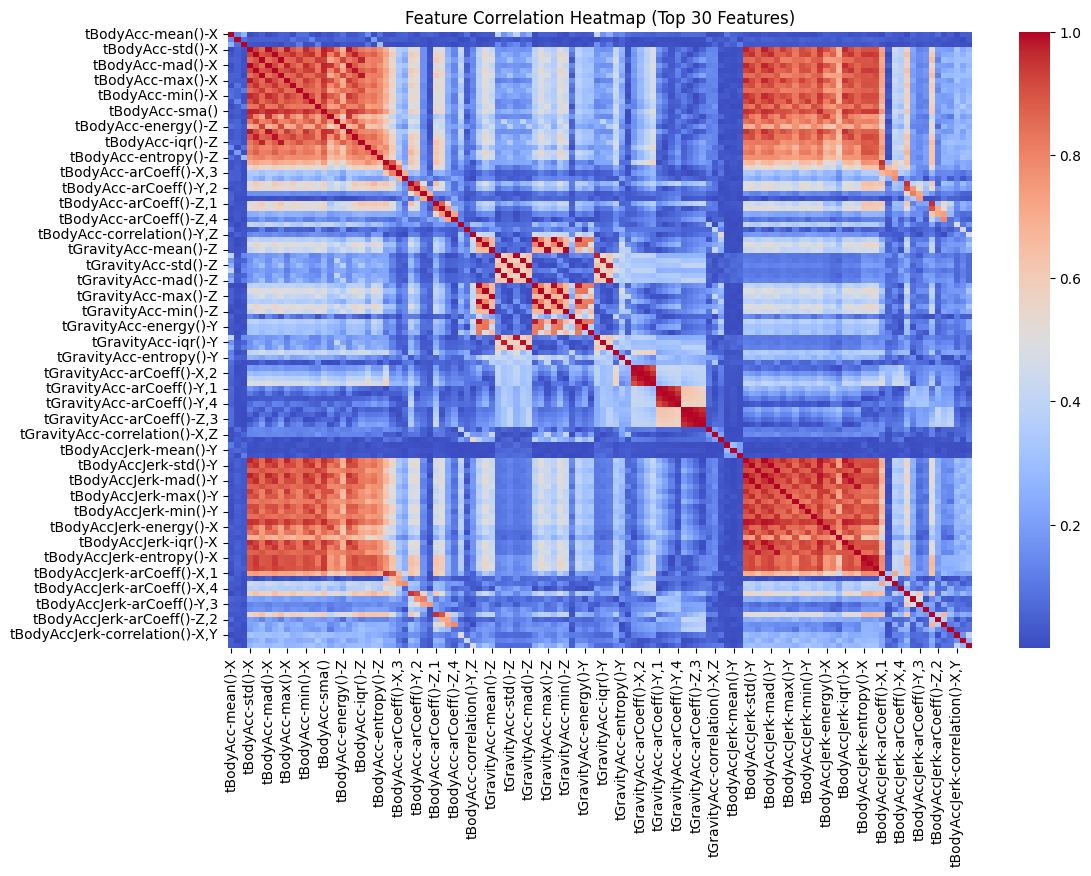

Highly correlated features to drop: ['tBodyAcc-std()-Y', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tGravityAcc-mad()-X', 'tGravityAcc-mad()-Y', 'tGravityAcc-mad()-Z', 'tGravityAcc-max()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-max()-Z', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z', 'tGravityAcc-energy()-X', 'tGravityAcc-iqr()-X', 'tGravityAcc-iqr()-Y', 'tGravityAcc-iqr()-Z', 'tGravityAcc-arCoeff()-X,2', 'tGravityAcc-arCoeff()-X,3', 'tGravityAcc-arCoeff()-X,4', 'tGravityAcc-arCoeff()-Y,2', 'tGravityAcc-arCoeff()-Y,3', 'tGravityAcc-arCoeff()-Y,4', 'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-arCoeff()-Z,3', 'tGravityAcc-arCoeff()-Z,4', 'tBodyAccJerk-std()-X', 'tBodyAccJerk-std()-Y', 'tBod

In [ ]:
# feature engineering using a correlation matrix

# Compute correlation matrix
corr_matrix = X_train.corr().abs()

# Plot heatmap for top 30 features
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.iloc[:121, :121], cmap="coolwarm")
plt.title("Feature Correlation Heatmap (Top 30 Features)")
plt.show()

# Keep only the upper triangle (to avoid duplicates)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated features to drop:", to_drop)
print("Number to drop:", len(to_drop))

# Drop columns
X_reduced = X_train.drop(columns=to_drop)
print("Original shape:", X_train.shape)
print("Reduced shape:", X_reduced.shape)

